# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.030263e+01     7.630070e+00
 * time: 0.006214141845703125
     1     2.724635e+01     4.055358e+00
 * time: 0.031113147735595703
     2     1.752632e+01     2.910762e+00
 * time: 0.06116294860839844
     3     1.200946e+01     2.253315e+00
 * time: 0.09032297134399414
     4     1.134425e+01     1.853851e+00
 * time: 0.11267709732055664
     5     1.062648e+01     2.041925e+00
 * time: 0.13626599311828613
     6     1.000469e+01     1.273981e+00
 * time: 0.15866303443908691
     7     9.590956e+00     1.142753e+00
 * time: 0.18133091926574707
     8     9.211345e+00     1.085883e+00
 * time: 0.2044539451599121
     9     8.826967e+00     1.104058e+00
 * time: 0.2271900177001953
    10     8.474443e+00     4.709083e-01
 * time: 0.2505209445953369
    11     8.294193e+00     4.851843e-01
 * time: 0.27317214012145996
    12     8.195064e+00     5.164448e-01
 * time: 0.2952611446380615
    13     8.141048e+00     3.420335e-01
 * time: 0

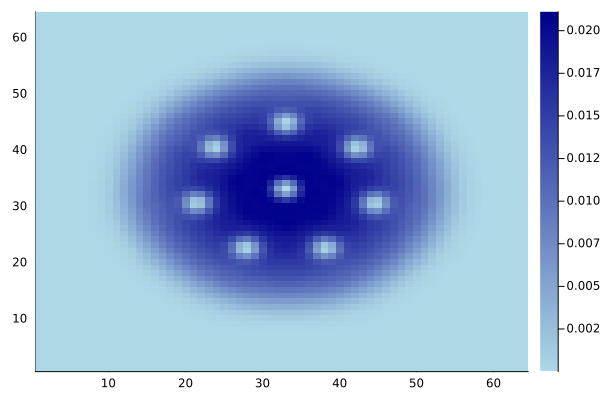

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)